Coursework 2: wvu analysis... u = speed, v = velocity, w = angle?
etc...
v = (u, v, w): 3 components (vertical,etc...)
About taking of measurements:
site: 1.7km from north sea
mean height : 2m above sea level
results Are 20 Hz measurements over 30 min period

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [3]:
df = pd.read_excel('uwv.xls')

In [4]:
df.describe()


,u,v,w
count,36000.000000,3.600000e+04,3.600000e+04
mean,9.151455,-5.614867e-15,7.287011e-16
std,0.854795,6.687267e-01,4.141895e-01
min,6.668239,-2.603525e+00,-2.361832e+00
25%,8.458506,-3.634512e-01,-2.502892e-01
50%,9.104761,1.529683e-02,6.170998e-02
75%,9.740735,4.047008e-01,2.932707e-01
max,12.061346,2.487530e+00,1.429760e+00


In [5]:
for i in df.columns:
    df['norm_{}'.format(i)] = df[i] - df[i].mean()

In [6]:
time = np.array([i*0.5 for i in range(0,36000)])
df['time'] = time

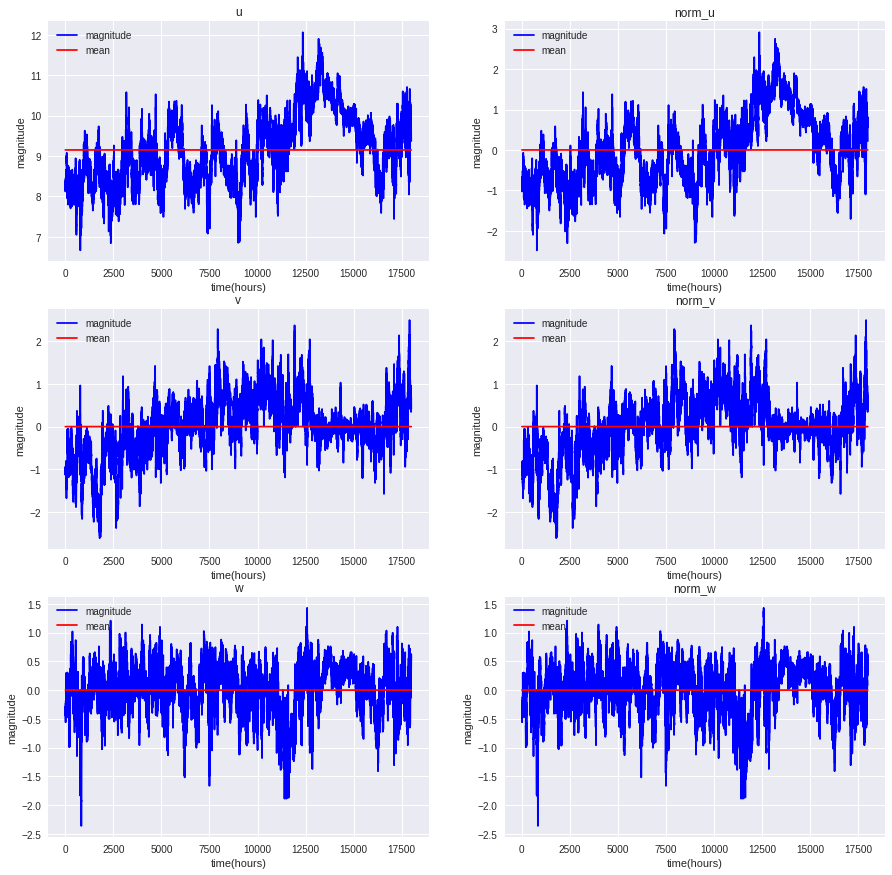

In [7]:
mpl.style.use('seaborn')
fig, axs = plt.subplots(3,2, figsize=(15,15))
axs = axs.ravel()
columnorder = ['u', 'norm_u', 'v', 'norm_v', 'w', 'norm_w']
for i, col in zip(range(0,6),columnorder):
    axs[i].plot(df['time'], df[col], color='b', label='magnitude')
    meanie = df[col].mean()
    axs[i].plot(df['time'], [meanie for i in range(36000)], label='mean', color='red')
    axs[i].set_xlabel('time(hours)')
    axs[i].set_ylabel('magnitude')
    axs[i].set_title(col)
    axs[i].legend(loc='upper left')

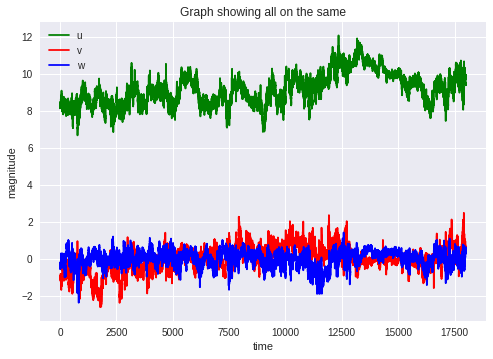

In [8]:
toplot = ['u', 'v', 'w']
colours = ['green', 'red', 'blue']
fig, axs = plt.subplots(1,1)
for i, color in zip(toplot, colours):
    axs.plot(df['time'], df[i], color=color, label=i)
axs.set_xlabel('time')
axs.set_ylabel('magnitude')
axs.set_title('Graph showing all on the same')
axs.legend(loc='upper left')

In [9]:
print('The standard deviatin of u is : {}, \nthe standard deviation of v is: {} , \nThe standard deviation of w \
    is : {}'.format(df['u'].std(), df['v'].std(), df['w'].std()))

The standard deviatin of u is : 0.8547951285542776, 
the standard deviation of v is: 0.6687267346561349 , 
The standard deviation of w     is : 0.414189509467188


In [10]:
print('Mean for u is : {} , \nMean for v is : {}, \nMean for w is : {}'.format(df['u'].mean(), df['v'].mean(), df['w'].mean()))

Mean for u is : 9.15145469183881 , 
Mean for v is : -5.6148665963620365e-15, 
Mean for w is : 7.287010501184138e-16


In [11]:
columnsfor = ['u', 'v', 'w']
df[columnsfor].agg([np.mean, np.std, np.min, np.max])

,u,v,w
mean,9.151455,-5.614867e-15,7.287011e-16
std,0.854795,6.687267e-01,4.141895e-01
amin,6.668239,-2.603525e+00,-2.361832e+00
amax,12.061346,2.487530e+00,1.429760e+00


In [12]:
df[columnsfor].describe(percentiles=[])

,u,v,w
count,36000.000000,3.600000e+04,3.600000e+04
mean,9.151455,-5.614867e-15,7.287011e-16
std,0.854795,6.687267e-01,4.141895e-01
min,6.668239,-2.603525e+00,-2.361832e+00
50%,9.104761,1.529683e-02,6.170998e-02
max,12.061346,2.487530e+00,1.429760e+00


In [13]:
df.shape

(36000, 7)

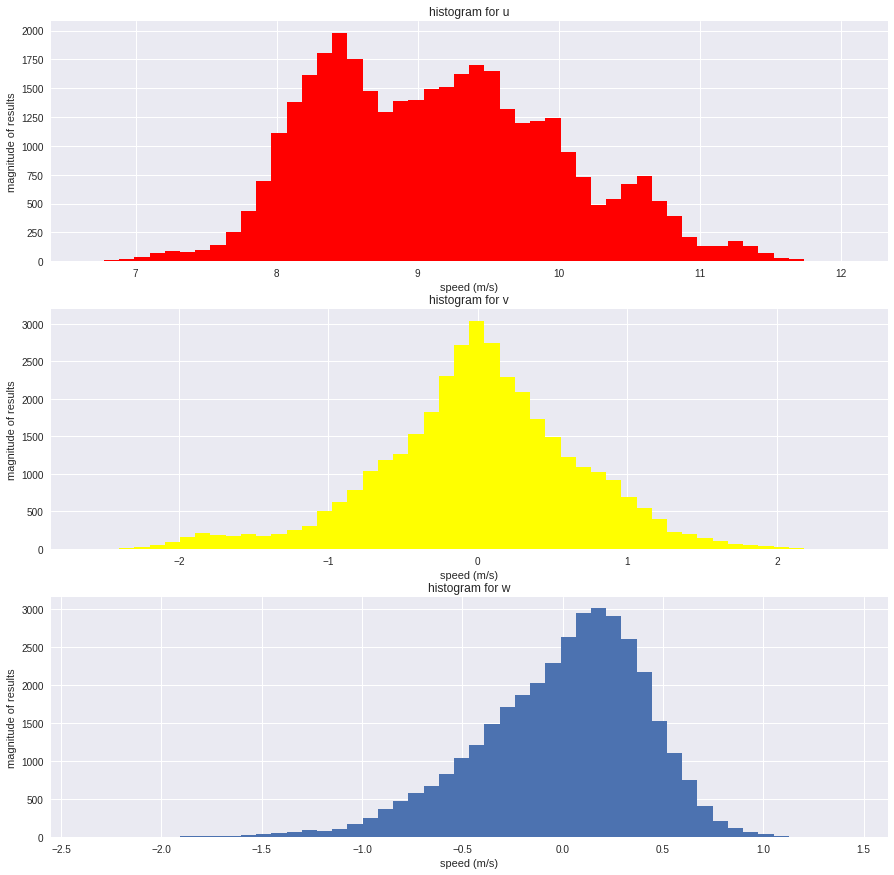

In [14]:
fig, axs = plt.subplots(3,1, figsize=(15,15))
axs[0].hist(df['u'], bins=50, color= 'red')
axs[0].set_title('histogram for u')
axs[1].hist(df['v'], bins=50, color='yellow')
axs[1].set_title('histogram for v')
axs[2].hist(df['w'], bins=50)
axs[2].set_title('histogram for w')
for i in range(0,3):
    axs[i].set_xlabel('speed (m/s)')
    axs[i].set_ylabel('magnitude of results')

In [32]:
bins, counts = np.histogram(df['v'], bins=50,density=True)

<BarContainer object of 50 artists>

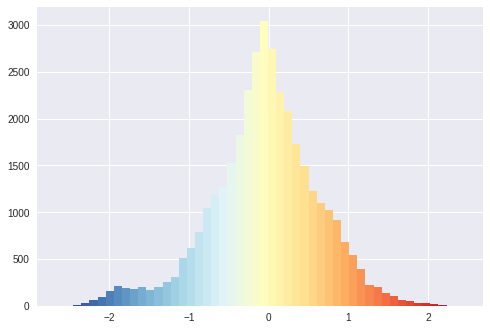

In [37]:
cm = plt.cm.get_cmap('RdYlBu_r')
Y, X = np.histogram(df['v'], bins=50)
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X] # 
# above here normalises to the colours :)! :)! 

plt.bar(X[:-1], Y, color=C, width=X[1]-X[0])


Not so relevent, should be redder when higher to denote high wind speeds.

<BarContainer object of 50 artists>

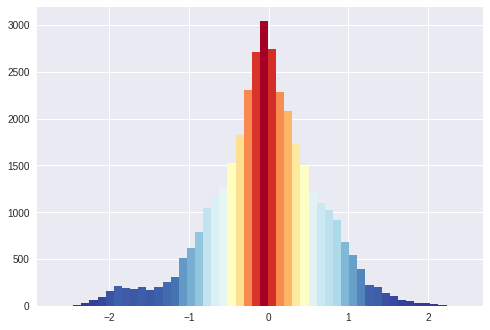

In [38]:
cm = plt.cm.get_cmap('RdYlBu_r')
Y, X = np.histogram(df['v'], bins=50)
y_span = Y.max()-Y.min()
C = [cm(((y-Y.min())/y_span)) for y in Y] # 
# above here normalises to the colours :)! :)! 

plt.bar(X[:-1], Y, color=C, width=X[1]-X[0])
# Yay i think I know how to do it all now


In [16]:
def moving_average(array, n):
    mov = list()
    for i in range(int(len(array)/n)):
        tmp = np.sum(array[n*i:i*n+3])/n
        mov.append(tmp)
    return mov

In [17]:
N=150

In [18]:
df1 = pd.DataFrame()
df1['v_moving'] = moving_average(df['v'], N)
df1['w_moving'] = moving_average(df['w'], N)
df1['u_moving'] = moving_average(df['u'], N)


In [19]:
df1['time'] = [val for i, val in enumerate(df['time']) if i%N ==0]

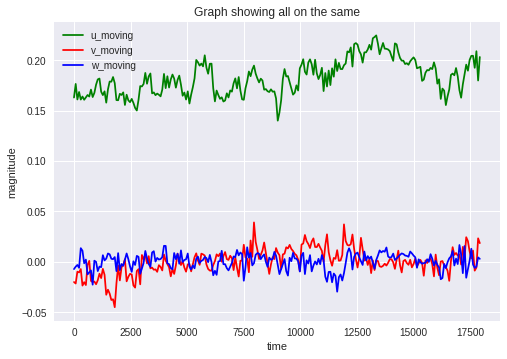

In [20]:
toplot = ['u_moving', 'v_moving', 'w_moving']
colours = ['green', 'red', 'blue']
fig, axs = plt.subplots(1,1)
for i, color in zip(toplot, colours):
    axs.plot(df1['time'], df1[i], color=color, label=i)
axs.set_xlabel('time')
axs.set_ylabel('magnitude')
axs.set_title('Graph showing all on the same')
axs.legend(loc='upper left')

v versus u? 

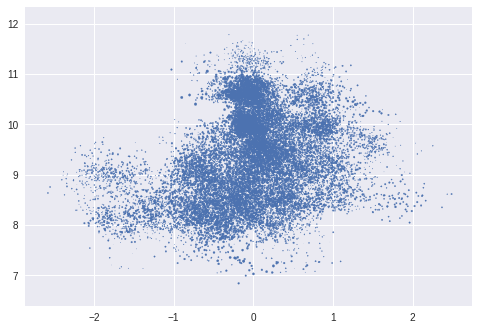

In [45]:
cm = plt.cm.get_cmap('RdYlBu_r')
v_span = df['v'].max()-df['u'].min()

C = [cm(((d- df['v'].min()/v_span))) for d in df['v']] # 


plt.scatter(df['v'], df['u'], s=df['w']*5, cmap=C )